# Assignment 6: Multi-layer Perceptron Classifier

For this assignment we used the Pokemon data set from the kaggle repository

https://www.kaggle.com/abcsds/pokemon

Our data set contains 13 features consisting of 8 quantitative features:
   * Encyclopedia number
   * Sum of all Stats
   * Hit Points
   * Attack
   * Defense
   * Special Attack
   * Special Defense
   * Speed
   
and 5 categorical features (sex)
   * Name
   * Type 1
   * Type 2
   * Generation
   * Legendary
   
  For the purposes of this assignment we only used 

In [9]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv("Pokemon.csv") #read in data
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Data Preprocessing
For the purposes of this assignment, we eliminate the following features:
* #
* Name
* Type 1
* Type 2
* Total
* Sp. Atk
* Sp. Def
* Generation
* Legendary

In [11]:
poke_stats = ['HP', "Attack", "Defense", "Speed"]
df = df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', "Legendary"])
df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserW

C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Janelle\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserW

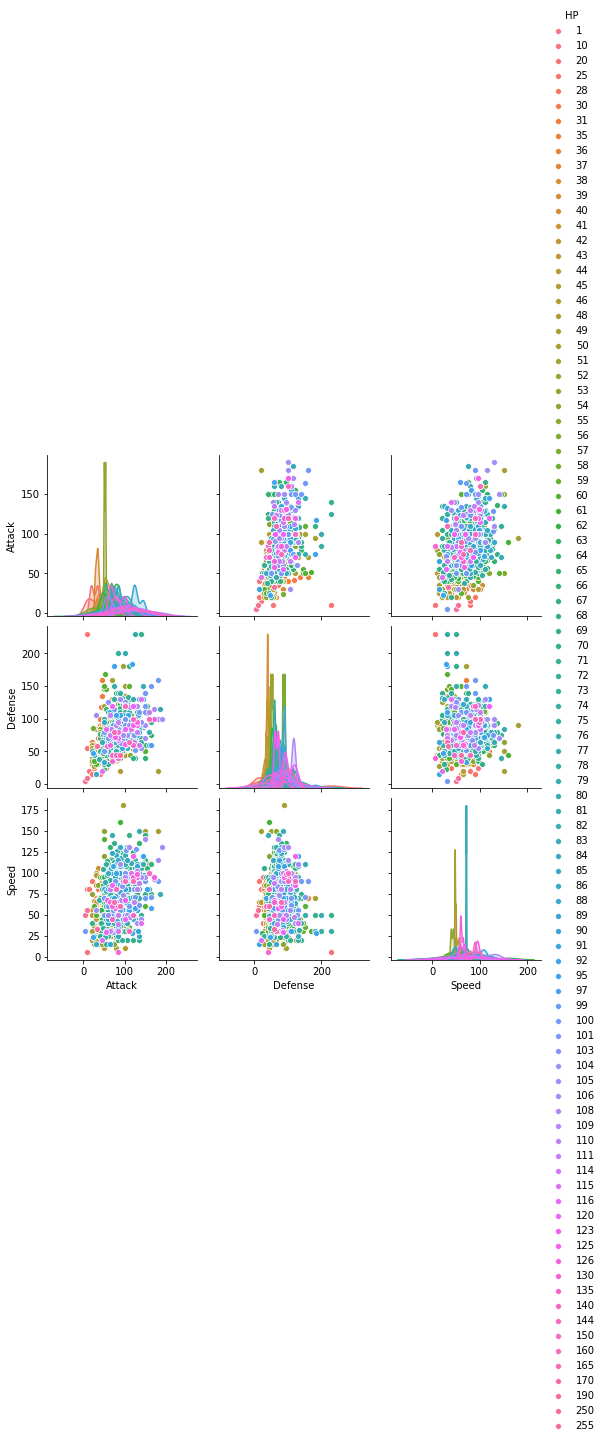

In [13]:
sns.pairplot(df, hue='HP')

In [14]:
#set independent and dependent variables
x = df.iloc[:,1:9] #all entries from column 1 to 3
leng = df.iloc[:,1]
dim = df.iloc[:,2]
rin = df.iloc[:,3]
x

,Attack,Defense,Speed
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,65
...,...,...,...
795,100,150,50
796,160,110,110
797,110,60,70
798,160,60,80


In [15]:
y = df.iloc[:,0]
print(y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [16]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0) #20% testing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)  # apply same transformation to test data

## Training with MLP Classifier

In [7]:
#Train and fit data
mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train,y_train)

print("Parameters: ")
print("Iterations: ", mlp_clf.n_iter_)
print("Learning Rate: 'constant'")
print("alpha: ", .0001)
print ("Learning Rate Iniitialization: ", .001)
print ("Tolerance: ", .0001)
print("Activation Function: 'relu'")
print("Number of Hidden Layers: ", mlp_clf.n_layers_ - 2)
print("Number of Neurons: ", 100)

#probability estimates
mlp_clf.predict_proba(x_train)

Parameters: 
Iterations:  259
Learning Rate: 'constant'
alpha:  0.0001
Learning Rate Iniitialization:  0.001
Tolerance:  0.0001
Activation Function: 'relu'
Number of Hidden Layers:  1
Number of Neurons:  100


array([[0.53429248, 0.46570752],
       [0.39245895, 0.60754105],
       [0.49016627, 0.50983373],
       ...,
       [0.11288654, 0.88711346],
       [0.45311065, 0.54688935],
       [0.36075265, 0.63924735]])

In [8]:
ypred = mlp_clf.predict(x_train)
ypred

array(['F', 'M', 'M', ..., 'M', 'M', 'M'], dtype='<U1')

## Training Set Performance Metrics

In [9]:
mlp_score = mlp_clf.score(x_train,y_train)
mlp_score

0.6115520282186949

In [10]:
cm = sklearn.metrics.confusion_matrix(y_train, ypred)
tn, fp, fn, tp = cm.ravel()
print("MLP Classifer: ")
print(cm)

MLP Classifer: 
[[485 551]
 [330 902]]


In [11]:
print("Evaluation Metrics for Training Set: ")
cr = classification_report(y_train,ypred)
print(cr)
print("Misclassification Rate = ", (fp + fn)/(tp + tn + fp + fn))

Evaluation Metrics for Training Set: 
              precision    recall  f1-score   support

           F       0.60      0.47      0.52      1036
           M       0.62      0.73      0.67      1232

    accuracy                           0.61      2268
   macro avg       0.61      0.60      0.60      2268
weighted avg       0.61      0.61      0.60      2268

Misclassification Rate =  0.38844797178130513


## Test Set Performance Metrics

In [12]:
y_test_pred = mlp_clf.predict(x_test)
y_test_pred

array(['F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F',
       'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F',
       'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F',
       'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M',
       'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F',
       'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M

In [13]:
mlp_test_score = mlp_clf.score(x_test,y_test)
mlp_test_score

0.5396825396825397

In [14]:
cm_test = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
tn_test, fp_test, fn_test, tp_test = cm.ravel()
print("MLP Classifer: ")
print(cm_test)

MLP Classifer: 
[[104 167]
 [ 94 202]]


In [15]:
print("Evaluation Metrics for Test Set: ")
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)
print("Misclassification Rate = ", (fp_test + fn_test)/(tp_test + tn_test + fp_test + fn_test))

Evaluation Metrics for Test Set: 
              precision    recall  f1-score   support

           F       0.53      0.38      0.44       271
           M       0.55      0.68      0.61       296

    accuracy                           0.54       567
   macro avg       0.54      0.53      0.53       567
weighted avg       0.54      0.54      0.53       567

Misclassification Rate =  0.38844797178130513


# MLP Classifier Alternate Parameters # 1

In [42]:
#Train and fit data
mlp_clf = MLPClassifier(hidden_layer_sizes=(5000,5), activation='tanh', 
                        alpha=0.00001, learning_rate='adaptive', learning_rate_init=0.001,
                        max_iter=500, random_state=1, tol=0.0001).fit(x_train,y_train)

print("Parameters: ")
print("Iterations: ", mlp_clf.n_iter_)
print("Learning Rate: 'adaptive'")
print("alpha: ", .00001)
print ("Learning Rate Iniitialization: ", .001)
print ("Tolerance: ", .0001)
print("Activation Function: 'tanh'")
print("Number of Hidden Layers: ", mlp_clf.n_layers_ - 2)
print("Number of Neurons: ", 5000)

#probability estimates
mlp_clf.predict_proba(x_train)

#probability estimates
mlp_clf.predict_proba(x_train)
ypred = mlp_clf.predict(x_train)
print("Training Set Performance Metrics")
mlp_score = mlp_clf.score(x_train,y_train)
print("MLP Score: ", mlp_score)
cm = sklearn.metrics.confusion_matrix(y_train, ypred)
tn, fp, fn, tp = cm.ravel()
print("MLP Classifer: ")
print(cm)

print("Evaluation Metrics for Training Set: ")
cr = classification_report(y_train,ypred)
print(cr)
print("Misclassification Rate = ", (fp + fn)/(tp + tn + fp + fn))

print("Test Set Performance Metrics")
y_test_pred = mlp_clf.predict(x_test)

mlp_test_score = mlp_clf.score(x_test,y_test)
print("MLP Score: ", mlp_test_score)
cm_test = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
tn_test, fp_test, fn_test, tp_test = cm.ravel()
print("MLP Classifer: ")
print(cm_test)
print("Evaluation Metrics for Test Set: ")
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)
print("Misclassification Rate = ", (fp_test + fn_test)/(tp_test + tn_test + fp_test + fn_test))


Parameters: 
Iterations:  53
Learning Rate: 'adaptive'
alpha:  1e-05
Learning Rate Iniitialization:  0.001
Tolerance:  0.0001
Activation Function: 'tanh'
Number of Hidden Layers:  2
Number of Neurons:  5000
Training Set Performance Metrics
MLP Score:  0.5776014109347443
MLP Classifer: 
[[403 633]
 [325 907]]
Evaluation Metrics for Training Set: 
              precision    recall  f1-score   support

           F       0.55      0.39      0.46      1036
           M       0.59      0.74      0.65      1232

    accuracy                           0.58      2268
   macro avg       0.57      0.56      0.56      2268
weighted avg       0.57      0.58      0.56      2268

Misclassification Rate =  0.42239858906525574
Test Set Performance Metrics
MLP Score:  0.5361552028218695
MLP Classifer: 
[[ 95 176]
 [ 87 209]]
Evaluation Metrics for Test Set: 
              precision    recall  f1-score   support

           F       0.52      0.35      0.42       271
           M       0.54      0.71    

# MLP Classifier Alternate Parameters # 2

In [45]:
#Train and fit data
mlp_clf = MLPClassifier(hidden_layer_sizes=(500,), activation='logistic', 
                        alpha=0.001, learning_rate='invscaling', learning_rate_init=0.0001,
                        max_iter=500, random_state=1, tol=0.001).fit(x_train,y_train)

print("Parameters: ")
print("Iterations: ", mlp_clf.n_iter_)
print("Learning Rate: 'invscaling'")
print("alpha: ", .001)
print ("Learning Rate Iniitialization: ", .0001)
print ("Tolerance: ", .001)
print("Activation Function: 'logistic'")
print("Number of Hidden Layers: ", mlp_clf.n_layers_ - 2)
print("Number of Neurons: ", 500)

#probability estimates
mlp_clf.predict_proba(x_train)

#probability estimates
mlp_clf.predict_proba(x_train)
ypred = mlp_clf.predict(x_train)
print("Training Set Performance Metrics")
mlp_score = mlp_clf.score(x_train,y_train)
print("MLP Score: ", mlp_score)
cm = sklearn.metrics.confusion_matrix(y_train, ypred)
tn, fp, fn, tp = cm.ravel()
print("MLP Classifer: ")
print(cm)

print("Evaluation Metrics for Training Set: ")
cr = classification_report(y_train,ypred)
print(cr)
print("Misclassification Rate = ", (fp + fn)/(tp + tn + fp + fn))

print("Test Set Performance Metrics")
y_test_pred = mlp_clf.predict(x_test)

mlp_test_score = mlp_clf.score(x_test,y_test)
print("MLP Score: ", mlp_test_score)
cm_test = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
tn_test, fp_test, fn_test, tp_test = cm.ravel()
print("MLP Classifer: ")
print(cm_test)
print("Evaluation Metrics for Test Set: ")
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)
print("Misclassification Rate = ", (fp_test + fn_test)/(tp_test + tn_test + fp_test + fn_test))


Parameters: 
Iterations:  14
Learning Rate: 'invscaling'
alpha:  0.001
Learning Rate Iniitialization:  0.0001
Tolerance:  0.001
Activation Function: 'logistic'
Number of Hidden Layers:  1
Number of Neurons:  500
Training Set Performance Metrics
MLP Score:  0.54673721340388
MLP Classifer: 
[[ 211  825]
 [ 203 1029]]
Evaluation Metrics for Training Set: 
              precision    recall  f1-score   support

           F       0.51      0.20      0.29      1036
           M       0.56      0.84      0.67      1232

    accuracy                           0.55      2268
   macro avg       0.53      0.52      0.48      2268
weighted avg       0.53      0.55      0.50      2268

Misclassification Rate =  0.4532627865961199
Test Set Performance Metrics
MLP Score:  0.5238095238095238
MLP Classifer: 
[[ 55 216]
 [ 54 242]]
Evaluation Metrics for Test Set: 
              precision    recall  f1-score   support

           F       0.50      0.20      0.29       271
           M       0.53      0.

# MLP Classifier Alternate Parameters # 3

In [44]:
#Train and fit data
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,5), activation='identity', 
                        alpha=0.01, learning_rate='constant', learning_rate_init=0.01,
                        max_iter=500, random_state=1, tol=0.001).fit(x_train,y_train)

print("Parameters: ")
print("Iterations: ", mlp_clf.n_iter_)
print("Learning Rate: 'constant'")
print("alpha: ", .01)
print ("Learning Rate Iniitialization: ", .01)
print ("Tolerance: ", .001)
print("Activation Function: 'identity'")
print("Number of Hidden Layers: ", mlp_clf.n_layers_ - 2)
print("Number of Neurons: ", 50)

#probability estimates
mlp_clf.predict_proba(x_train)

#probability estimates
mlp_clf.predict_proba(x_train)
ypred = mlp_clf.predict(x_train)
print("Training Set Performance Metrics")
mlp_score = mlp_clf.score(x_train,y_train)
print("MLP Score: ", mlp_score)
cm = sklearn.metrics.confusion_matrix(y_train, ypred)
tn, fp, fn, tp = cm.ravel()
print("MLP Classifer: ")
print(cm)

print("Evaluation Metrics for Training Set: ")
cr = classification_report(y_train,ypred)
print(cr)
print("Misclassification Rate = ", (fp + fn)/(tp + tn + fp + fn))

print("Test Set Performance Metrics")
y_test_pred = mlp_clf.predict(x_test)

mlp_test_score = mlp_clf.score(x_test,y_test)
print("MLP Score: ", mlp_test_score)
cm_test = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
tn_test, fp_test, fn_test, tp_test = cm.ravel()
print("MLP Classifer: ")
print(cm_test)
print("Evaluation Metrics for Test Set: ")
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)
print("Misclassification Rate = ", (fp_test + fn_test)/(tp_test + tn_test + fp_test + fn_test))


Parameters: 
Iterations:  15
Learning Rate: 'constant'
alpha:  0.01
Learning Rate Iniitialization:  0.01
Tolerance:  0.001
Activation Function: 'identity'
Number of Hidden Layers:  2
Number of Neurons:  50
Training Set Performance Metrics
MLP Score:  0.5590828924162258
MLP Classifer: 
[[517 519]
 [481 751]]
Evaluation Metrics for Training Set: 
              precision    recall  f1-score   support

           F       0.52      0.50      0.51      1036
           M       0.59      0.61      0.60      1232

    accuracy                           0.56      2268
   macro avg       0.55      0.55      0.55      2268
weighted avg       0.56      0.56      0.56      2268

Misclassification Rate =  0.4409171075837742
Test Set Performance Metrics
MLP Score:  0.5432098765432098
MLP Classifer: 
[[122 149]
 [110 186]]
Evaluation Metrics for Test Set: 
              precision    recall  f1-score   support

           F       0.53      0.45      0.49       271
           M       0.56      0.63      

Comparison:
After altering several parameters of our cases we found that none of our combinations came close to the accuracy of the initial parameters: those that used 'relu', the optimal activation function. Additionally, we found that altering our alpha and tolerance hyperparameters tended to affect our accuracy very little. The parameters that had the biggest impact on our results were the Activation function and the number of neurons.